<a href="https://colab.research.google.com/github/p25-c4/kerly_project/blob/main/0317_ji_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 38.8 MB/s eta 0:00:00


In [3]:
!pip install wordcloud matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 11.5 MB/s eta 0:00:000:00:01


In [ ]:
!pip install tqdm

In [154]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import konlpy
import zipfile
import io

from multiprocessing import Pool
from konlpy.tag import Kkma
from konlpy.tag import Okt
from tqdm import tqdm
from tqdm import trange, notebook
from tqdm.notebook import tqdm

In [65]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [139]:
# ZIP 파일 경로
zip_file_path = 'kurly.zip'
# ZIP 파일 열기
with zipfile.ZipFile(zip_file_path) as z:
    # ZIP 파일 내에서 'total.csv' 찾기
    with z.open('kurly.csv') as csv_file:
        # CSV 파일을 Pandas DataFrame으로 읽기
        df = pd.read_csv(csv_file)
        
# 한글을 제외한 문자 공백으로 대체
df['CleanedItemName'] = df['CleanedItemName'].str.replace('[^가-힣]', ' ', regex=True)
df['CleanedItemName'] = df['CleanedItemName'].str.replace('내외|마리|세트|개수|박스', ' ', regex=True)

# 연령대와 성별로 그룹화
grouped = df.groupby(['AgeGroup', 'Gender'])
# 각 그룹별 데이터프레임을 별도로 저장하기 위한 변수 생성
globals().update({f'df_{age}_{gender}': group_df.reset_index(drop=True) for (age, gender), group_df in grouped})

### 20대 여성

  0%|          | 0/152660 [00:00<?, ?it/s]

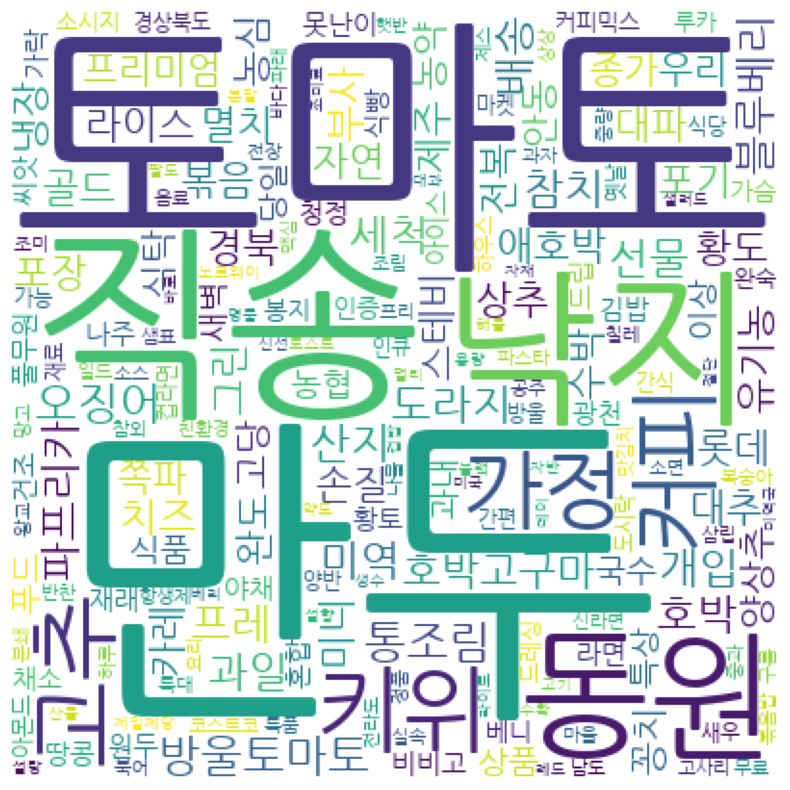

In [151]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()

okt = Okt()

# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_20s_여성['CleanedItemName'].progress_apply(okt.nouns)


# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()

# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
                    
# 글자별 빈도 계산
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)

# 상위 10개 단어 제# 상위 10개 단어 제거거
df_word = df_word[10:]

# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']

# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

# 이름 바꿔
plt.savefig('20s_여성_wordcloud') # 파일 저장

### 30대 여성

  0%|          | 0/254081 [00:00<?, ?it/s]

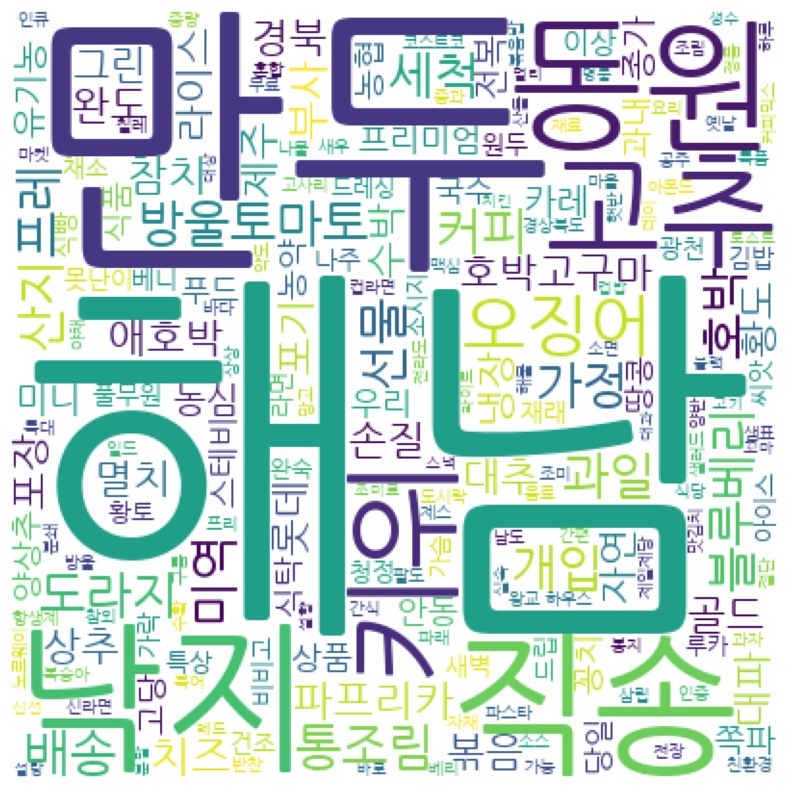

In [152]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()

okt = Okt()

# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_30s_여성['CleanedItemName'].progress_apply(okt.nouns)


# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()

# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
                    
# 글자별 빈도 계산
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)

# 상위 10개 단어 제# 상위 10개 단어 제거거
df_word = df_word[10:]

# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']

# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

# 이름 바꿔
plt.savefig('30s_여성_wordcloud') # 파일 저장

### 40대 여성

  0%|          | 0/110703 [00:00<?, ?it/s]

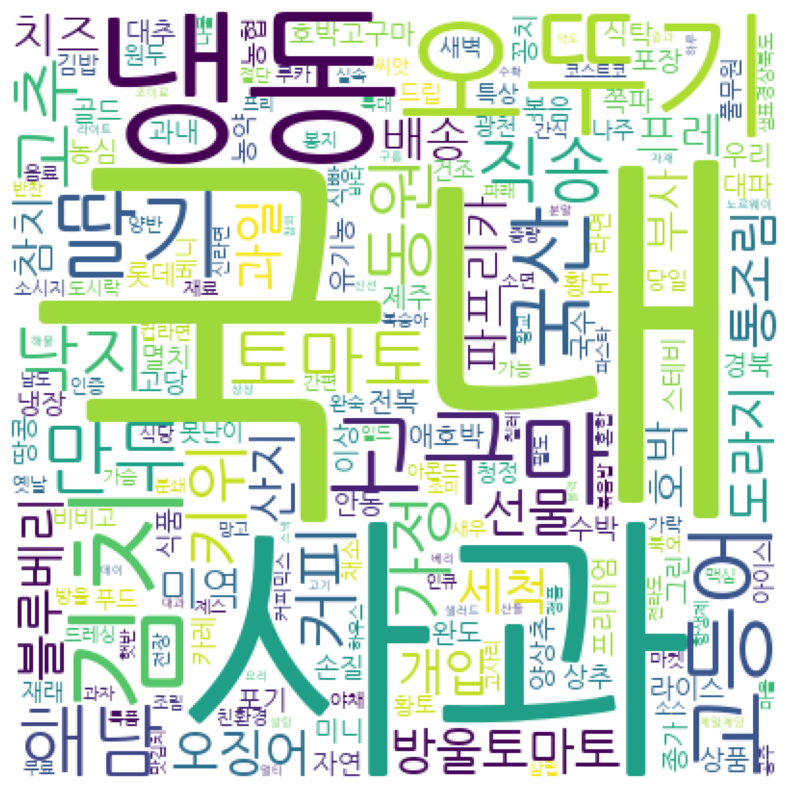

In [153]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()

okt = Okt()

# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_40s_여성['CleanedItemName'].progress_apply(okt.nouns)


# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()

# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')

 # 상위 10개 단어 제# 상위 10개 단어 제거거
df_word = df_word[10:]       

# 글자별 빈도 계산
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)

# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']

# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

# 이름 바꿔
plt.savefig('40s_여성_wordcloud') # 파일 저장